# Health Care Dataset - INM701 Coursework
Postgraduate students: 
- Tamila Skakova
- Elbarraa Elalami

## Content:
- **[Part 1](#part1)- Importing the data set, packages used**
- **[Part 2](#part2)- Exploratory data analysis**
- [Part 2.1](#part2.1)- Analysis of the features
- [Part 2.2](#part2.2)- Analysis of the Target
- [Part 2.3](#part2.3)- Statistical analysis of the dataset
- **[Part 3](#part3) -  Preparing our data**
- [Part 3.1](#part3.1) -  Missing Values
- [Part 3.2](#part3.2) -  Enconding, Shuffling, Scaling
- [Part 3.3](#part3.3) -  Multicollinearity
- [Part 3.4](#part3.4) -  SMOTE Analysis
- **[Part 4](#part4) -  Models**
- [Part 4.1](#part4.1) -  Score mthod
- [Part 4.2](#part4.2) -  KNN
- [Part 4.3](#part4.3) -  NN
- [Part 4.4](#part4.4) -  Decision tree model (reservation_status included)
- [Part 4.5](#part4.5) -  Random Forest
- [Part 4.6](#part4.6) -  Naive Bayes
- **[Part 5](#part5) -  Additional Models**
- [Part 5.1](#part5.1) -  Gradient Boost Classifier
- [Part 5.2](#part5.2) -  CatBoost Classifier
- [Part 5.2](#part5.2) -  XGB BOOST Classifier

## Description of features in the dataframe:

- `Column`	Description
- `case_id`	Case_ID registered in Hospital
- `Hospital_code`	Unique code for the Hospital
- `Hospital_type_code`	Unique code for the type of Hospital
- `City_Code_Hospital` City Code of the Hospital
- `Hospital_region_code`	Region Code of the Hospital
- `Available Extra Rooms in Hospital`	Number of Extra rooms available in the Hospital
- `Department`	Department overlooking the case
- `Ward_Type`	Code for the Ward type
- `Ward_Facility_Code`	Code for the Ward Facility
- `Bed Grade`	Condition of Bed in the Ward
- `patientid`	Unique Patient Id
- `City_Code_Patient`	City Code for the patient
- `Type of Admission`	Admission Type registered by the Hospital
- `Severity of Illness`	Severity of the illness recorded at the time of admission
- `Visitors with Patient`	Number of Visitors with the patient
- `Age`	Age of the patient
- `Admission_Deposit`	Deposit at the Admission Time
- `Stay`	Stay Days by the patient, the length of stay - 11 different classes ranging from 0-10 days to more than 100 days.


[Back to top](#Content:)


<a id='part1'></a>

## Part 1 -  Importing the data set, packages used

In [ ]:
import os
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
import io
import requests
%matplotlib inline

In [ ]:
path = "healthcare"

filename_read = os.path.join(path, "train_data.csv")
health_care = pd.read_csv(filename_read, na_values=['NA', '?'])

# print(health_care.shape)
# print(health_care.columns)

In [ ]:
health_care.head(10)

[Back to top](#Content:)

<a id='part2'></a>
## Part 2- Exploratory data analysis (EDA)

[Back to top](#Content:)

<a id='part2.1'></a>
### Analysis of the features

In [ ]:
#sorting by Stay for better representation in the visualisations
health_care = health_care.sort_values(by = "Stay", ascending = True)
# To make sure we consider all the correct features to make an accurate prediction, it may be useful to create some plots to have a better understanding of our data and relationship between them and the output feature. For that we have used Python data visualisation library seaborn. We begin by visualising the length of stays by age of patients admitted to hospitals, type of admissions, severity of illness, available extra rooms in hospitals,  etc., by using a countplot(), that shows the counts of observations in each categorical bin using bars.

In [ ]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Age", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Age", hue = 'Stay', data = health_care)

In [ ]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Hospital_region_code", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Hospital_region_code", hue = 'Stay', data = health_care)

In [ ]:
#plot size
plt.figure(figsize = (20,4))
#plot title
plt.title("Available Extra Rooms in Hospital", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Available Extra Rooms in Hospital", hue = 'Stay', data = health_care)

In [ ]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Type of Admission", fontdict = {'fontsize': 15})
ax = sns.countplot(x = "Type of Admission", hue = 'Stay', data = health_care)


In [ ]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Severity of Illness", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Severity of Illness", hue = 'Stay', data = health_care)

In [ ]:
#plot size
plt.figure(figsize = (15,8))
#plot title
plt.title("Department", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Department", hue = 'Stay', data = health_care)

[Back to top](#Content:)

<a id='part2.2'></a>
### Analysis of the Target

In [ ]:
## Checking target
#creating a copy of df to have an original for further manipulation
health_care_copy = health_care.copy()
target = health_care_copy['Stay']

In [ ]:
## Encoding data
encoder = LabelEncoder()
target_enc = encoder.fit_transform(target)

In [ ]:
#number of unique element for each feature
health_care_copy['Stay_cat'] = encoder.fit_transform(health_care_copy['Stay'])
n = len(health_care_copy['Stay_cat'])
l = []
for i in range(len(np.unique(health_care_copy['Stay_cat']))):
    k = len(health_care[health_care_copy['Stay_cat']==i])
    #print(f'N {10*i} and {10*(i+1)} is : {k}')
    print(f'{i}- {k}  : {100*k/n:.2f}%')

In [ ]:
#Visualisation of Target categories
fig, ax1 = plt.subplots()
labels = np.unique(health_care['Stay'])
labels[-1] = '100+'

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:6]
plt.pie(health_care.groupby('Stay').size(), labels = labels,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(20, 15.5)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Percentage of occurence of each category')
plt.show()

In [ ]:
#Histogram plot
h = health_care['Stay'].sort_values()
h[h=='More than 100 Days'] = '100+'
plt.figure(figsize = (8,8))
plt.hist(h, bins=11, label=labels, density=True, facecolor='g', alpha=0.75)

plt.xlabel('LOS')
plt.ylabel('Occurence')
plt.title('Histogram of LOS')

plt.grid(True)
plt.show()

[Back to top](#Content:)

<a id='part2.3'></a>
### Statistical analysis of the dataset

In [ ]:
#statistical analysis of each feature
df_copy = health_care.copy()
df_copy = df_copy.select_dtypes(include=["int","float"])
headers = list(df_copy.columns.values)
fields = []
for field in headers:
    fields.append({
        "name":field,
        "mean":health_care[field].mean(),
        "var":health_care[field].var(),
        "sdev":health_care[field].std()
    })
for field in fields:
    print(field)

In [ ]:
## functions to feed to barplot
def mean(x):
    return np.mean(x)

def median(x):
    return np.median(x)

def std(x):
    return np.std(x)

In [ ]:
## Estimate of length of stay
target_estimate = 10* (target_enc) + 5
# Adding the estimate to the dataframe
df_copy['Stay Estimate'] = target_estimate

In [ ]:
# Mean Analysis
#We study the relationship between the mean of stay and each feature
for feature in column_features :
    order = pd.unique(health_care[feature])
    order.sort()
    ax = sns.barplot(x=feature, y="Stay Estimate", data=health_care,order=order, estimator=mean)
    ax.set_title(f'Means of {feature} classes') 
    plt.show();

In [ ]:
#Median Analysis
for feature in column_features :
    order = pd.unique(health_care[feature])
    order.sort()
    ax = sns.barplot(x=feature, y="Stay Estimate", data=health_care,order=order, estimator=median)
    ax.set_title(f'Medians of {feature} classes') 
    plt.show();

In [ ]:
#Analysis of Std
for feature in column_features :
    order = pd.unique(health_care[feature])
    order.sort()
    ax = sns.barplot(x=feature, y="Stay Estimate", data=health_care,order=order, estimator=std)
    ax.set_title(f'Stds of {feature} classes') 
    plt.show();

[Back to top](#Content:)

<a id='part3'></a>
## Part 3 - Preparing our data

[Back to top](#Content:)

<a id='part3.1'></a>
### Missing Values

In [ ]:
#checking for missing values
health_care.isnull().values.any()

In [ ]:
#Checking number of NANs for each column, in order to understand how many missing values there are in a dataframe.
print("# of NaN in each columns:", health_care.isnull().sum(), sep='\n')

In [ ]:
#calculates percentage of missing values in the specific feature
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

In [ ]:
print('Missing value ratios:\nBed Grade: {}\nCity_Code_Patient: {}'.format(
    perc_mv(health_care, health_care['Bed Grade']),
    perc_mv(health_care, health_care['City_Code_Patient'])))

In [ ]:
#In the code cell below, we use the attribute dtype on df to retrieve the data type for each column.
print (health_care.dtypes)

In [ ]:
#We want to map the name of each Severity of Illness to the corresponding number in ascending order.
health_care['Severity of Illness'] = health_care['Severity of Illness'].map({'Minor':1, 'Moderate': 2, 'Extreme':3})
health_care['Type of Admission'] = health_care['Type of Admission'].map({'Trauma':1, 'Emergency': 2, 'Urgent':3})
# health_care

In [ ]:
#dropping features
elements_to_remove = ['case_id', 'City_Code_Hospital', 'City_Code_Patient', 'patientid', 'Bed Grade', 'Admission_Deposit']
health_care = health_care.drop(elements_to_remove, axis=1)

In [ ]:
# #uniting the predictors 
# #playing with the parameters
# health_care["Stay"] = health_care["Stay"].map({'0-10':'0-20', 
#                              '11-20':'0-20', 
#                              '21-30':'21-30', 
#                              '31-40':'21-30', 
#                              '41-50':'31-40', 
#                              '51-60':'31-40',
#                              '61-70':"more than 60 Days",  
#                              '71-80':"more than 60 Days", 
#                              '81-90':"more than 60 Days", 
#                              '91 - 100':"more than 60 Days", 
#                              'More than 100 Days' :"more than 60 Days"})

# # df.iloc[np.random.permutation(len(df))]

[Back to top](#Content:)

<a id='part3.2'></a>
### Enconding, Shuffling, Scaling

In [ ]:
#using LabelEncoder to change and transform the object format of 
le = LabelEncoder()
for col in ['Hospital_type_code', 'Hospital_region_code','Ward_Type', 'Ward_Facility_Code', 'Department', 'Age', 'Stay']:
    health_care[col]= health_care[col].astype('str')
    health_care[col]= le.fit_transform(health_care[col])
print (health_care.dtypes)

In [ ]:
# # Function to hot encode the column with name : name for dataframe df
# def encode_text_dummy(df, name):
#     dummies = pd.get_dummies(df[name])
#     for x in dummies.columns:
#         dummy_name = f"{name}-{x}"
#         df[dummy_name] = dummies[x]
#     df.drop(name, axis=1, inplace=True) ## inplace to make changed on the original df

In [ ]:
# ohEncoder = OneHotEncoder()

# Xe = health_care.drop(columns = ["Stay"])
# ye = health_care["Stay"]

# #hot encoding
# ## Pre processing these columns
# dummies_string_columns = ['Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',  'Type of Admission']
# for column in dummies_string_columns :
#     encode_text_dummy(Xe, column)
    
# ## label_encoded data
# Xe['Age'] = encoder.fit_transform(Xe['Age'])
# ye = ohEncoder.fit_transform(ye)

In [ ]:
# #Scaling Hot Encoded Data
# scaler = StandardScaler()
# X = X.values
# y = y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# for i in range(X_train.shape[1]) :
#     X_train[:,i]= scaler.fit_transform(X_train[:,i].reshape(-1, 1))[:,0]
#     X_test[:,i] = scaler.transform(X_test[:,i].reshape(-1, 1))[:,0]

In [ ]:
#shuffling
health_care= health_care.reindex(np.random.permutation(health_care.index))
health_care.reset_index(inplace=True, drop=True)

In [ ]:
#initialisation
X = health_care.drop(columns = ["Stay"])
y = health_care["Stay"]
scaler=StandardScaler()

[Back to top](#Content:)

<a id='part3.3'></a>
### Multicollinearity

In [ ]:
# Heatmap
fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(health_care.corr(), annot=True, linewidths=.5, ax=ax)

In [ ]:
#OLS
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
#VIF
X_VIF = health_care
data = pd.DataFrame()
data["feature"] = X_VIF.columns
data["VIF"] = [variance_inflation_factor(X_VIF.values, i) for i in range(len(X_VIF.columns))]
print(data)

In [ ]:
#Choosing the number of components
X_scaler = StandardScaler().fit_transform(X)
pca = PCA().fit(X_scaler)

In [ ]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
# For our analysis we choose n_components = 7
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaler)
X_pca_with_constant = sm.add_constant(X_pca)

In [ ]:
model = sm.OLS(y, X_pca_with_constant)
results = model.fit()
print(results.summary())

[Back to top](#Content:)

<a id='part3.4'></a>
### SMOTE analysis

In [ ]:
health_care["Stay"].value_counts().plot.bar()

In [ ]:
smote_health_care = health_care.copy()

# X = np.array(smote_health_care.loc[:, smote_health_care.columns != "Stay"])
y = np.array(smote_health_care.loc[:, smote_health_care.columns == "Stay"]).reshape(-1, 1)

X = scaler.fit_transform(X_pca_with_constant)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_with_constant, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)

clf = LogisticRegression(solver = 'lbfgs')
oversample = SMOTE(random_state = 33)

X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

In [ ]:
# observe that data has been balanced
pd.Series(y_train_SMOTE).value_counts().plot.bar()

In [ ]:
# fit the model
clf.fit(X_train_SMOTE, y_train_SMOTE)

# prediction for Training data
train_pred_sm = clf.predict(X_train_SMOTE)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [ ]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_SMOTE))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test.ravel()))


[Back to top](#Content:)


<a id='part4'></a>

## Part - 4 Models 

[Back to top](#Content:)

<a id='part4.1'></a>
### Score method

In [ ]:
# Score of 1 is perfect. The closer the score to 1 the better
K = 10 # Num of Classes - 1 here

# Classes can be ranked here from 0-10
def score(pred, target):
    error = (np.mean(np.abs(pred-target)))/K
    score = 1 - error
    return score

[Back to top](#Content:)

<a id='part4.2'></a>
### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train) 

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
#accuracy
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

In [ ]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

In [ ]:
#with Smote
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train_SMOTE, y_train_SMOTE) 

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
#accuracy
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

In [ ]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

[Back to top](#Content:)

<a id='part4.3'></a>
### NN

In [ ]:
nn = Sequential()

#model.add(Dropout(0.1)) #applies to layer before ie input here
nn.add(Dense(12, input_dim=X.shape[1], activation='relu'))
nn.add(Dense(8, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.add(Dropout(0.2))
nn.add(Dense(1))

In [ ]:
nn.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
nn.fit(X_train,y_train,verbose=2,epochs=2)
pred = nn.predict(X_test)
#accuracy
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

In [ ]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))
nn.summary()

In [ ]:
# # compile the keras model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # fit the keras model on the dataset
# model.fit(X, y, epochs=150, batch_size=10)
# # evaluate the keras model
# accuracy = model.evaluate(X, y)
# print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

[Back to top](#Content:)

<a id='part4.4'></a>
### Decision Trees

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)

In [ ]:
y_pred = tree.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.2f' % score(y_test.ravel(), y_pred.ravel()))

In [ ]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

In [ ]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

In [ ]:
#with SMOTE
tree.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = tree.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.2f' % score(y_test.ravel(), y_pred.ravel()))

[Back to top](#Content:)

<a id='part4.5'></a>
### Random Forest

In [ ]:
forest = RandomForestClassifier(n_estimators=10, criterion='entropy')
forest.fit(X_train, y_train)

In [ ]:
y_pred = forest.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test.ravel(), y_pred.ravel()))

In [ ]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

In [ ]:
### Cross Validating to check some results
kf = KFold(5, shuffle=True)
fold = 1

for train_index, validate_index in kf.split(X,y):
    forest.fit(X[train_index], y[train_index])
    ytest = y[validate_index]
    y_pred = forest.predict(X[validate_index])
    print(f'Accuracy : %.4f' % accuracy_score(ytest, y_pred))
    print(f'Score : %.4f' % score(ytest.ravel(), y_pred.ravel()))

In [ ]:
#Trying Different num of estimators
accuracy_data = []
score_data = []

for i in range(1,2):
    forest = RandomForestClassifier(n_estimators=i, criterion='entropy')
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    score = 1-np.mean(np.abs(y_test-y_pred))/K
    print(f'Accuracy {i} estimators : %.4f' % accuracy)
    print(f'Score {i} estimators : %.4f' % score)
    accuracy_data.append(accuracy)
    score_data.append(score)

In [ ]:
nums = np.arange(1,40)
fig = plt.figure(figsize=(6,5))
plt.plot(nums, accuracy_data, c='r', label='Accuracy')
plt.plot(nums, score_data, label='Score')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy and Score')
plt.legend(loc='upper right')
plt.show();

In [ ]:
#Last Model results
y_pred = forest.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.4f' % score)

In [ ]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

[Back to top](#Content:)


<a id='part4.'></a>
### Naive Bayes

In [ ]:
smoothing = [1e-3, 1e-2, 1e-1, 1, 10,100]
for i in range(len(smoothing)):
    model = GaussianNB(var_smoothing=smoothing[i])
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)
    print('var_smoothing = ',smoothing[i] )
    print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
    score = 1-np.mean(np.abs(y_test-y_pred))/K
    print(f'Score : %.4f' % score)
    print('---------' )

In [ ]:
## Keeping smoothing = 1
model = GaussianNB(var_smoothing=1)
model.fit(X_test, y_test)
y_pred = model.predict(X_test)

In [ ]:
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

[Back to top](#Content:)


<a id='part5'></a>

## Part - 5 Additional Models

[Back to top](#Content:)


<a id='part5.1'></a>
### Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.4f' % score)

In [ ]:
# Model Precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))

# Model Recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

[Back to top](#Content:)


<a id='part5.2'></a>
### Cat Boost Classifier

In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=1000)
cb.fit(X_train, y_train)

In [ ]:
y_pred = cb.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))

In [ ]:
y_pred = y_pred.flatten()
y_pred.shape

In [ ]:
y_diff = np.abs(y_test-y_pred)

In [ ]:
score = 1-np.mean(y_diff)/K
print(f'Score : %.4f' % score)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

[Back to top](#Content:)


<a id='part5.3'></a>
### XGB BOOST Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

In [ ]:
y_pred = xgb.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.4f' % score)

One technique/tool for address unbalanced data is SMOTE.  I've added the original SMOTE paper to the module page (thanks to Esther for digging it out).  I've also linked to the libraries associated with this (contains a whole suite of techniques for unbalanced data).

https://moodle.city.ac.uk/pluginfile.php/2571477/mod_resource/content/1/SMOTE.pdf

https://imbalanced-learn.org/stable/references/index.html



**Plan**: we need to understand correlations:
- **1** 'Severity of Illness' at 'Type of Admission' on 'Stay', those with higher - longer
- **2** if high, then less 'Visitors with Patient'  but long 'Stay'
- **3** prior knowledge of LOS can aid in logistics such as room and bed allocation planning= all high risk together

## Content:
- [Part 1](#part1)- Importing the data set
- [Part 2](#part2)- Exploratory data analysis
- [Part 3](#part3) -  Preparing our data
- [Part 4](#part4) -  Correlation
- [Part 5](#part5) -  Splitting our data for modelling
- [Part 6](#part6) -  Decision tree model (reservation_status included)
- [Part 7](#part7) -  Random Forest
- [Part 8](#part8) -  Naïve Bayes
- [Part 9](#part9) -  Gradient Boost Classifier
- [Part 10](#part10) -  CatBoost Classifier
    The length of stay - 11 different classes ranging from 0-10 days to more than 100 days.

**Here's a description of what some of the features in the dataframe above represent:**

- `Column`	Description
- `case_id`	Case_ID registered in Hospital
- `Hospital_code`	Unique code for the Hospital
- `Hospital_type_code`	Unique code for the type of Hospital
- `City_Code_Hospital` City Code of the Hospital
- `Hospital_region_code`	Region Code of the Hospital
- `Available Extra Rooms in Hospital`	Number of Extra rooms available in the Hospital
- `Department`	Department overlooking the case
- `Ward_Type`	Code for the Ward type
- `Ward_Facility_Code`	Code for the Ward Facility
- `Bed Grade`	Condition of Bed in the Ward
- `patientid`	Unique Patient Id
- `City_Code_Patient`	City Code for the patient
- `Type of Admission`	Admission Type registered by the Hospital
- `Severity of Illness`	Severity of the illness recorded at the time of admission
- `Visitors with Patient`	Number of Visitors with the patient
- `Age`	Age of the patient
- `Admission_Deposit`	Deposit at the Admission Time
- `Stay`	Stay Days by the patient


[Back to top](#Content:)


<a id='part1'></a>

### Part 1 -  Importing the data set

In [11]:
import os
# import sys
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
%matplotlib inline

# import tensorflow as tf
# from tensorflow import keras


# Metric for classification 

Score of 1 is perfect.
The closer the score to 1 the better


In [3]:
path = "healthcare"

filename_read = os.path.join(path, "train_data.csv")
health_care = pd.read_csv(filename_read, na_values=['NA', '?'])

# print(df[0:5])
print(health_care.shape)
print(health_care.columns)

(318438, 18)
Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')


In [5]:
health_care.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


[Back to top](#Content:)

<a id='part2'></a>
### Part 2- Exploratory data analysis (EDA)

In [9]:
#creating a copy of df to have an original for further manipulation
new_df = health_care.copy()
new_df = new_df.select_dtypes(include=["int","float"])

headers = list(new_df.columns.values)

## For this part you should drop  :
- Case_id
- Hospital_code
- patientid
- City_Code_Patient

There mean/std is not relevant

In [7]:
fields = []
for field in headers:
    fields.append({
        "name":field,
        "mean":health_care[field].mean(),
        "var":health_care[field].var(),
        "sdev":health_care[field].std()
    })
for field in fields:
    print(field)

{'name': 'case_id', 'mean': 159219.5, 'var': 8450256523.484579, 'sdev': 91925.27684747313}
{'name': 'Hospital_code', 'mean': 18.318840716246175, 'var': 74.54172342795314, 'sdev': 8.633754885792921}
{'name': 'City_Code_Hospital', 'mean': 4.771716943329627, 'var': 9.62572562697152, 'sdev': 3.102535354669068}
{'name': 'Available Extra Rooms in Hospital', 'mean': 3.1976271676119055, 'var': 1.364624484865746, 'sdev': 1.1681714278588335}
{'name': 'Bed Grade', 'mean': 2.625806958297338, 'var': 0.7623835960741749, 'sdev': 0.873145804590605}
{'name': 'patientid', 'mean': 65747.57947229916, 'var': 1442475571.9882374, 'sdev': 37979.93644002367}
{'name': 'City_Code_Patient', 'mean': 7.251858836721821, 'var': 22.517545245763493, 'sdev': 4.745265561142337}
{'name': 'Visitors with Patient', 'mean': 3.2840992595104854, 'var': 3.1119125861261314, 'sdev': 1.7640613895571013}
{'name': 'Admission_Deposit', 'mean': 4880.749392346391, 'var': 1181082.625479292, 'sdev': 1086.7762536416094}


#????**here should an analysis of columns means and st dev**

Missing Values

In [8]:
#checking for missing values
health_care.isnull().values.any()

True

In [9]:
#Checking number of NANs for each column, in order to understand how many missing values there are in a dataframe.
print("# of NaN in each columns:", health_care.isnull().sum(), sep='\n')

# of NaN in each columns:
case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64


## NA values :

Represent 1.45% for the data set, i think either drop it or check later if City_Code_Patient is actually a relevant covariant, if not drop it and keep the rest of data

## Feature engineering

We will add 2 features : 
- Visit number
- New Patient

In [10]:
n = health_care.shape[0]
visits = []
patientid = np.array(health_care['patientid'])
for i in range(n) :
    count = (patientid[:i+1] == patientid[i]).sum()
    visits.append(count)
    
health_care['Visit Number'] = visits
health_care['New Patient'] = (health_care['Visit Number']==1).astype('int32')

To make sure we consider all the correct features to make an accurate prediction, it may be useful to create some plots to have a better understanding of our data.

we will be using the Python data visualisation library seaborn. 

We could begin by visualising the length of stays by type of admissions etc., by using a countplot(), that shows the counts of observations in each categorical bin using bars.

In [11]:
#sorting by Stay for better representation in the visualisations
df= health_care.sort_values(by = "Stay", ascending = True)
df.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
136814,136815,28,b,11,X,2,gynecology,R,F,3.0,112307,1.0,Emergency,Moderate,2,21-30,4517.0,0-10
136815,136816,29,a,4,X,3,gynecology,S,F,3.0,112307,1.0,Emergency,Moderate,2,21-30,3846.0,0-10
136823,136824,11,b,2,Y,4,gynecology,Q,D,4.0,64198,14.0,Emergency,Moderate,2,21-30,5183.0,0-10
136837,136838,14,a,1,X,3,gynecology,R,E,3.0,76865,1.0,Emergency,Extreme,3,51-60,3452.0,0-10
136845,136846,1,d,10,Y,3,radiotherapy,S,B,4.0,19181,7.0,Emergency,Minor,2,51-60,3908.0,0-10
136846,136847,1,d,10,Y,2,radiotherapy,S,B,4.0,19181,7.0,Emergency,Minor,2,51-60,3934.0,0-10
136847,136848,12,a,9,Y,5,gynecology,Q,B,1.0,19181,7.0,Urgent,Moderate,4,51-60,3410.0,0-10
136866,136867,14,a,1,X,2,gynecology,R,E,3.0,101538,8.0,Emergency,Moderate,3,51-60,4222.0,0-10
136874,136875,6,a,6,X,2,gynecology,Q,F,3.0,40220,8.0,Emergency,Moderate,4,71-80,5746.0,0-10


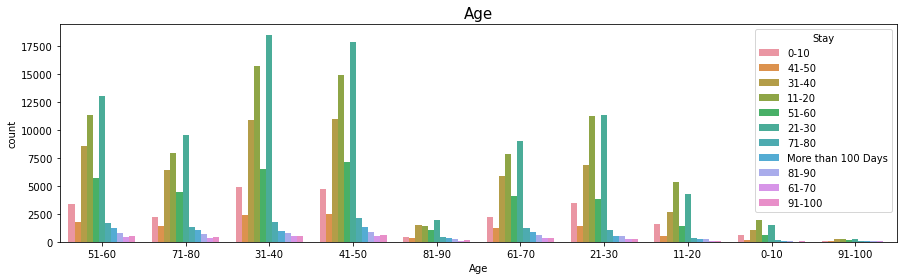

In [8]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Age", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Age", hue = 'Stay', data = health_care)

In [13]:
#?? comments
#the age group risk - 21-80y.o.

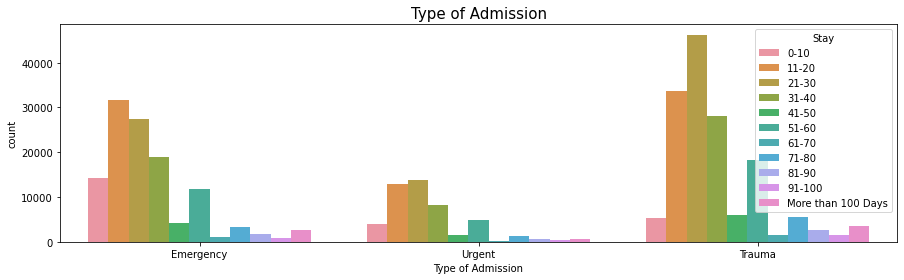

In [14]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Type of Admission", fontdict = {'fontsize': 15})
ax = sns.countplot(x = "Type of Admission", hue = 'Stay', data = health_care)


???? comments on the graph


Emergency and Trauma and mostly from 11 - 40  and range 51-60 


Next, it may be interesting to look at the Severity of Illness segments by stay.

Again, we can use a count plot to visualise this.

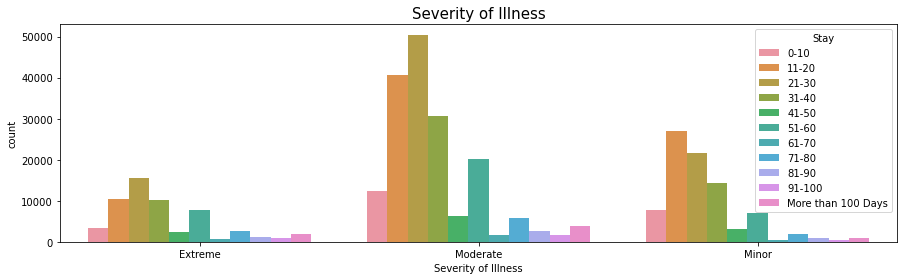

In [15]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Severity of Illness", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Severity of Illness", hue = 'Stay', data = health_care)

???? comments on the graph: 


mostly moderate and minor, and in age range 11-40  and range 51-60 


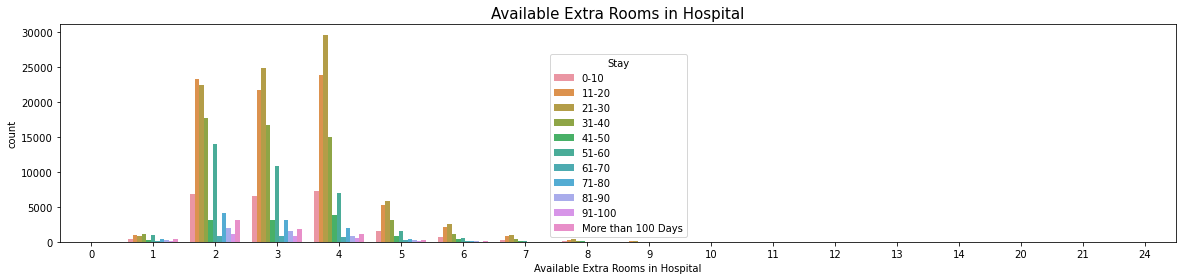

In [16]:
#plot size
plt.figure(figsize = (20,4))
#plot title
plt.title("Available Extra Rooms in Hospital", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Available Extra Rooms in Hospital", hue = 'Stay', data = health_care)

???? comments on the graph

most rooms have additional 2-4 beds in the room available.

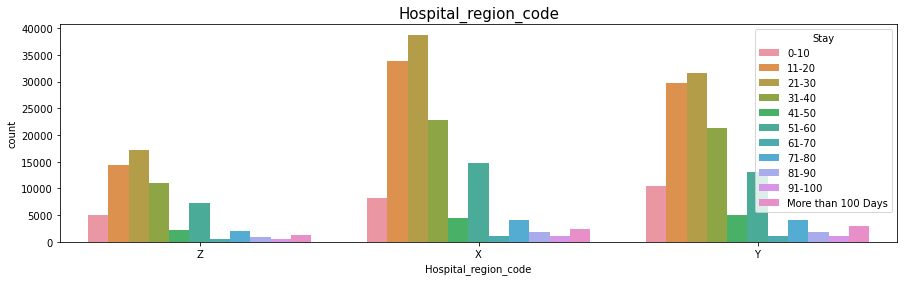

In [17]:
#plot size
plt.figure(figsize = (15,4))
#plot title
plt.title("Hospital_region_code", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Hospital_region_code", hue = 'Stay', data = df)

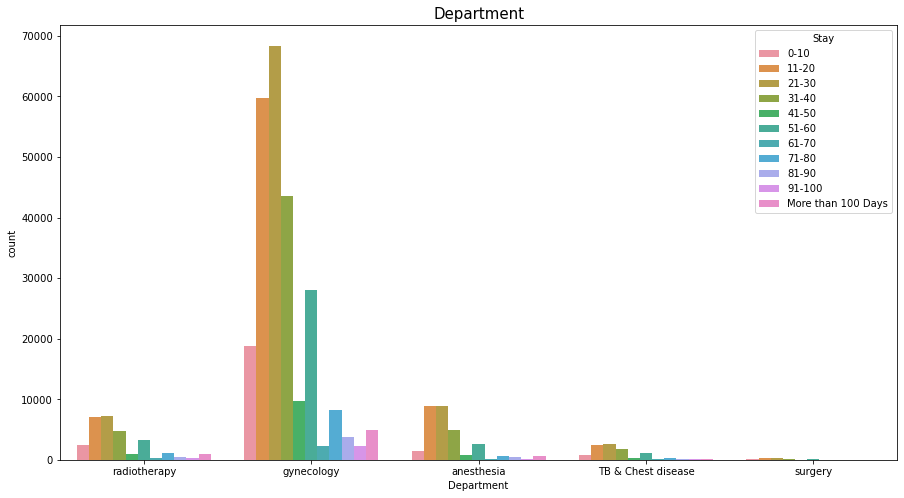

In [18]:
#plot size
plt.figure(figsize = (15,8))
#plot title
plt.title("Department", fontdict = {'fontsize':15})
ax = sns.countplot(x = "Department", hue = 'Stay', data = df)

In [19]:
#??? commments
#mostly gynecology department

# Data Analysis Part - Baraa

In [20]:
## Checking target
target = health_care['Stay']

In [21]:
## Encoding data
encoder = LabelEncoder()
target_enc = encoder.fit_transform(target)

### Checkin for number of unique element for each feature

In [22]:
for column in health_care.columns :
    x = pd.unique(health_care[column])
    print(f'number of unique elements of  {column} is : {len(x)}')

number of unique elements of  case_id is : 318438
number of unique elements of  Hospital_code is : 32
number of unique elements of  Hospital_type_code is : 7
number of unique elements of  City_Code_Hospital is : 11
number of unique elements of  Hospital_region_code is : 3
number of unique elements of  Available Extra Rooms in Hospital is : 18
number of unique elements of  Department is : 5
number of unique elements of  Ward_Type is : 6
number of unique elements of  Ward_Facility_Code is : 6
number of unique elements of  Bed Grade is : 5
number of unique elements of  patientid is : 92017
number of unique elements of  City_Code_Patient is : 38
number of unique elements of  Type of Admission is : 3
number of unique elements of  Severity of Illness is : 3
number of unique elements of  Visitors with Patient is : 28
number of unique elements of  Age is : 10
number of unique elements of  Admission_Deposit is : 7300
number of unique elements of  Stay is : 11
number of unique elements of  Visit

## Visualisation of Target categories

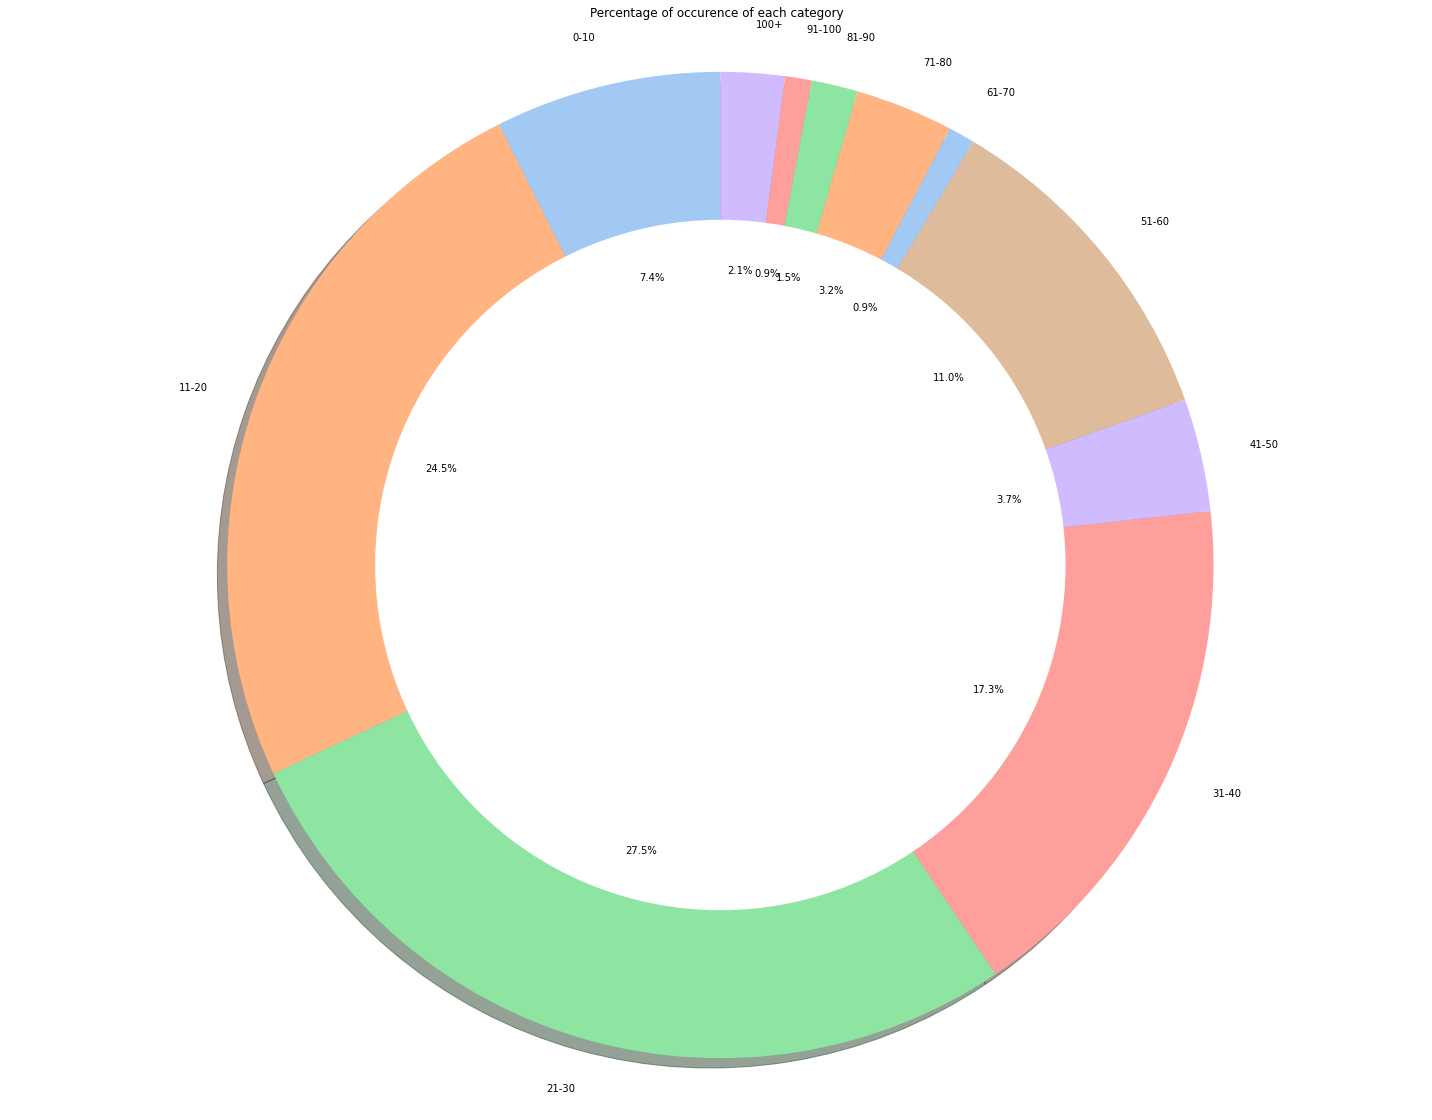

In [23]:
fig, ax1 = plt.subplots()
labels = np.unique(health_care['Stay'])
labels[-1] = '100+'

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:6]
plt.pie(health_care.groupby('Stay').size(), labels = labels,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(20, 15.5)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Percentage of occurence of each category')
plt.show()

## Remark

Data shows an unusual distribution of the length of stay categories, especially we see that the 51-60 category is abnormally higher than what we could expect.

McClean and Millard (1993) have established that lognormal and exponential mixture distributions might be a better description for the LOS dataset. Marazzi et al. (1998) established to check the adequacy of lognormal (long tailed), Weibull and gammamodels (short tailed) to study LOS and concluded that Weibull and gamma behaved similarly in nature. Clark and Ryan (2002) and Clark et al. (2007) considered piecewise exponential models for predicting mortality, hospital LOS, and long-term care for trauma patients. Gardiner (2014) considered Coxian phase-type models, mixtures of exponential distributions, and other heavy-tailed distributions such as Weibull, Pareto, generalized Pareto, lognormal for modeling LOS by parametric and Bayesian approaches. The modeling of LOS with the help of convolutive mixture distribution for studying the short and long stay of patients in the hospital is studied by Ickowicz and Sparks (2016).

## Histogram plot 


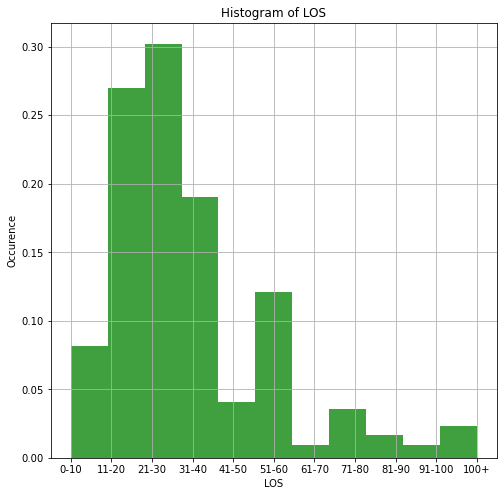

In [24]:
h = health_care['Stay'].sort_values()
h[h=='More than 100 Days'] = '100+'
plt.figure(figsize = (8,8))
plt.hist(h, bins=11, label=labels, density=True, facecolor='g', alpha=0.75)



plt.xlabel('LOS')
plt.ylabel('Occurence')
plt.title('Histogram of LOS')


plt.grid(True)
plt.show()

The percentage of patient staying more than 60 days is 8.55%

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
health_care['Stay_cat'] = encoder.fit_transform(health_care['Stay'])
n = len(health_care['Stay_cat'])
l = []
for i in range(len(np.unique(health_care['Stay_cat']))):
    k = len(health_care[health_care['Stay_cat']==i])
    #print(f'N {10*i} and {10*(i+1)} is : {k}')
    print(f'{i}- {k}  : {100*k/n:.2f}%')
   
    
    
    
    

0- 23604  : 7.41%
1- 78139  : 24.54%
2- 87491  : 27.48%
3- 55159  : 17.32%
4- 11743  : 3.69%
5- 35018  : 11.00%
6- 2744  : 0.86%
7- 10254  : 3.22%
8- 4838  : 1.52%
9- 2765  : 0.87%
10- 6683  : 2.10%


In [5]:
## functions to feed to barplot
def mean(x):
    return np.mean(x)

def median(x):
    return np.median(x)

def std(x):
    return np.std(x)


In [27]:
## Estimate of length of stay
target_estimate = 10* (target_enc) + 5
# Adding the estimate to the dataframe
health_care['Stay Estimate'] = target_estimate


In [28]:
## Using only Features with limited classes for the plot
elements_to_remove = ['case_id', 'patientid', 'Admission_Deposit', 'Stay', 'Stay Estimate']
column_features = [ column for column in health_care.columns if column not in elements_to_remove]
print(column_features)

['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Age', 'Visit Number', 'New Patient', 'Stay_cat']


## Mean Analysis

We study the relationship between the mean of stay and each feature

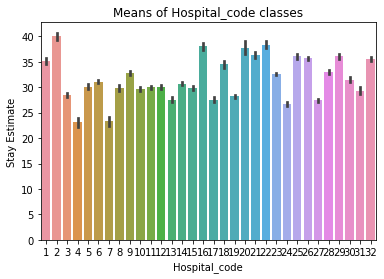

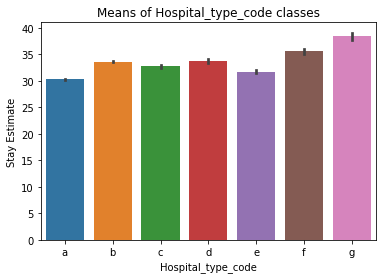

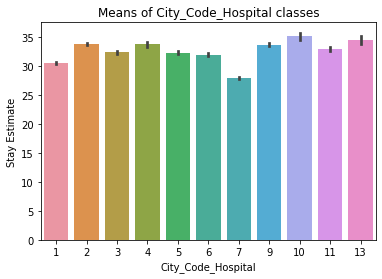

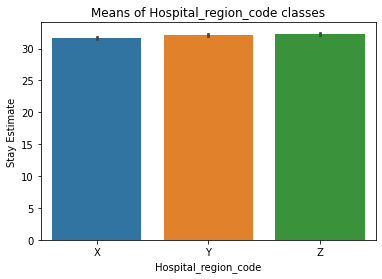

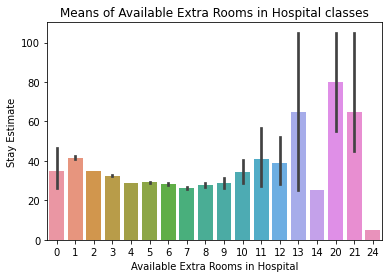

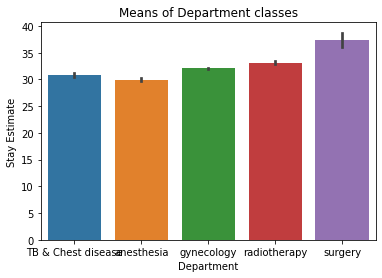

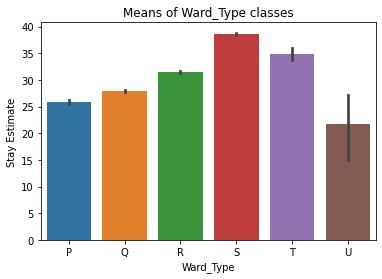

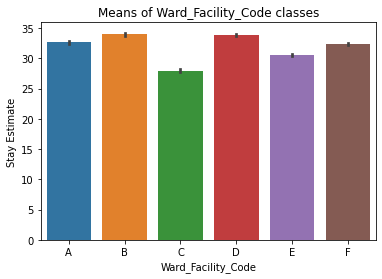

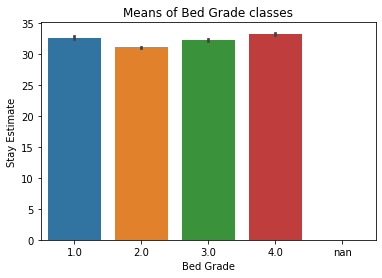

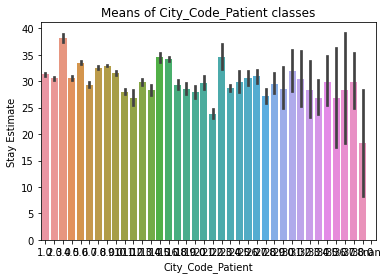

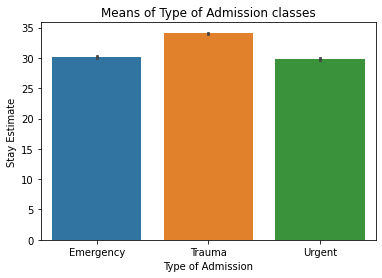

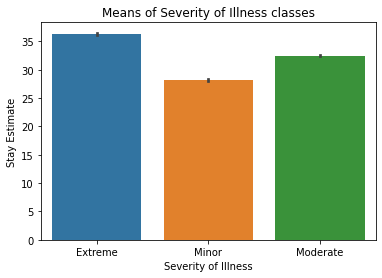

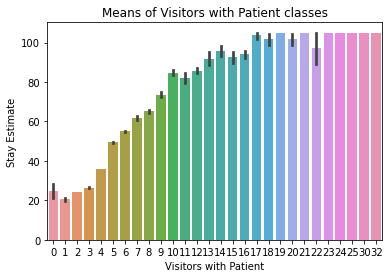

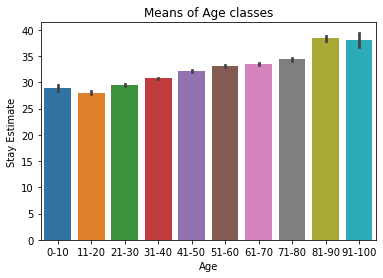

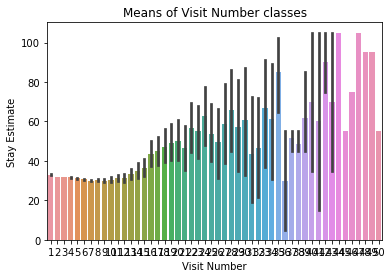

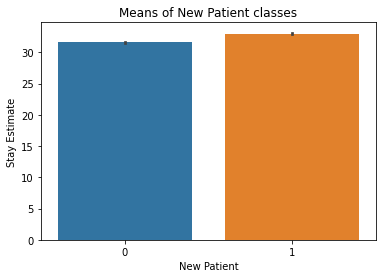

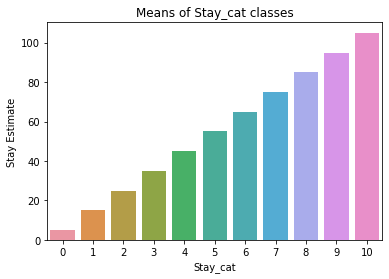

In [29]:
for feature in column_features :
    order = pd.unique(health_care[feature])
    order.sort()
    ax = sns.barplot(x=feature, y="Stay Estimate", data=health_care,order=order, estimator=mean)
    ax.set_title(f'Means of {feature} classes') 
    plt.show();
    
    
    
    

## Conclusion :

Feature that appear to have some influence on the mean of the stay : 
- Hospital_code
- Available Extra Room : To verifiy if the amount of available data is conclusive 
- Ward_Type
- City_Code_Patient
- Type Of Admission
- Severity of Illness
- Visitors with Patient : To verify since maybe it's correlated to the length of stay
- Age

The 2 features that seem to have a good prediction power from the plot are :
- Visitor with Patient
- Age

**Remark** : Data source doesn't specify if the visitor with patient is correlated to the time of stay ? 

## Median Analysis


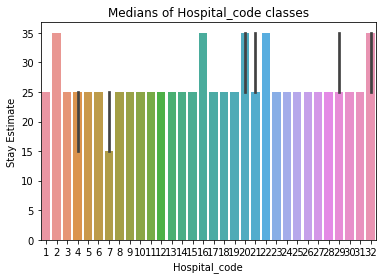

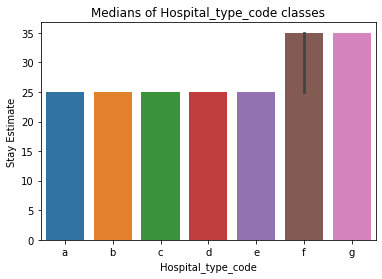

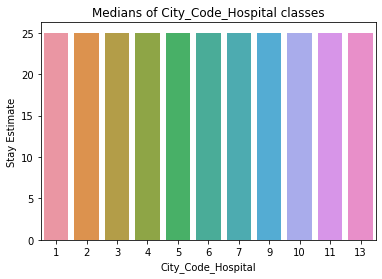

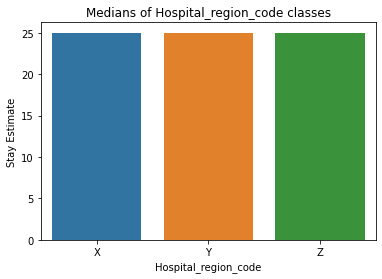

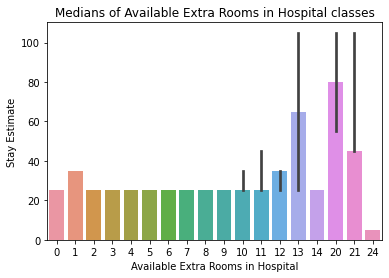

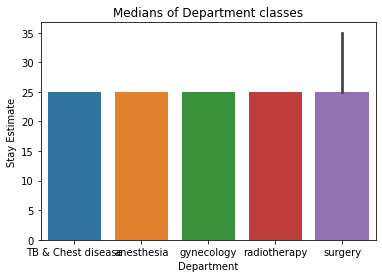

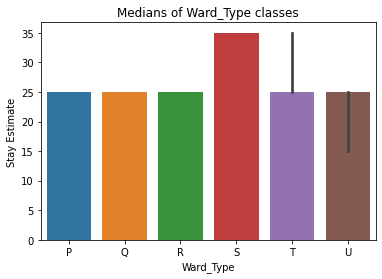

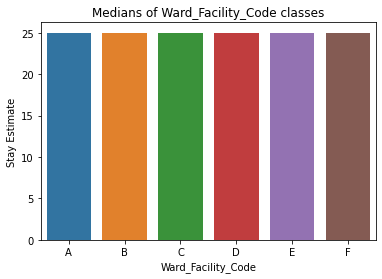

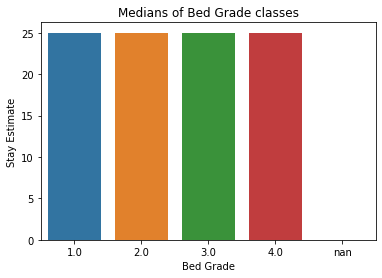

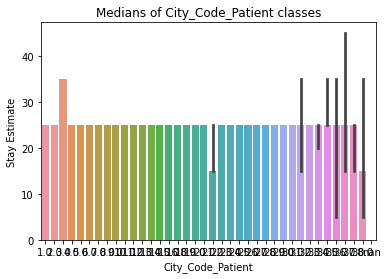

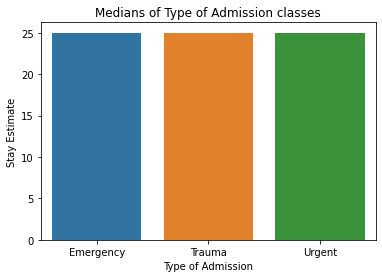

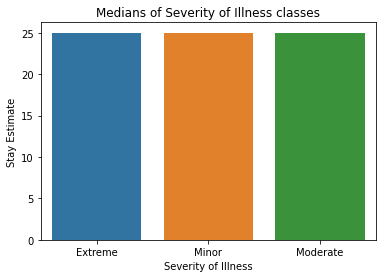

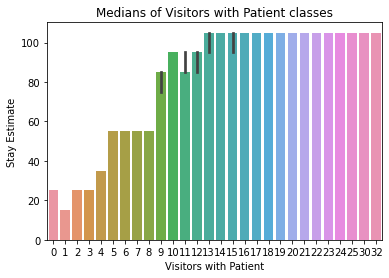

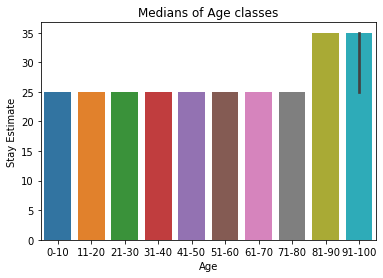

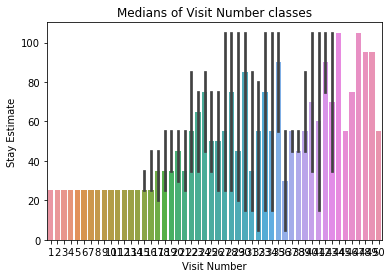

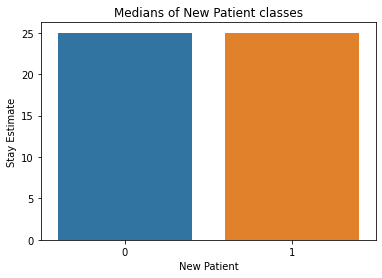

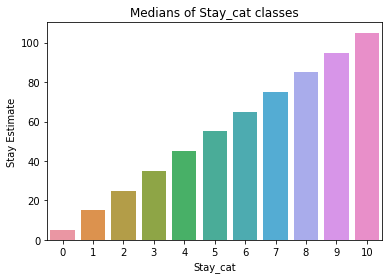

In [30]:
for feature in column_features :
    order = pd.unique(health_care[feature])
    order.sort()
    ax = sns.barplot(x=feature, y="Stay Estimate", data=health_care,order=order, estimator=median)
    ax.set_title(f'Medians of {feature} classes') 
    plt.show();
    
    
    
    

## Conclusion :

Feature that appear to have some influence on the median of the stay : 
- Hospital_code
- Hospital_type_code
- Available Extra Room : To verifiy if the amount of available data is conclusive 
- Ward_Type
- City_Code_Patient
- Visitors with Patient : To verify since maybe it's correlated to the length of stay
- Age

## Analysis of Std

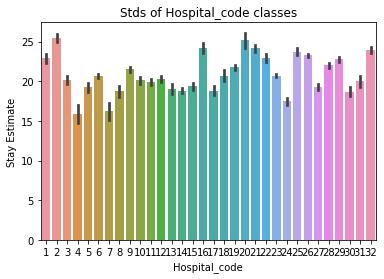

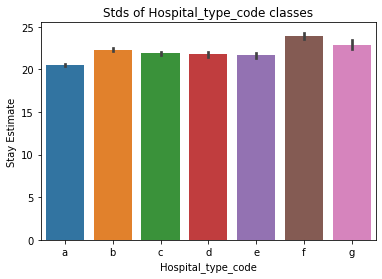

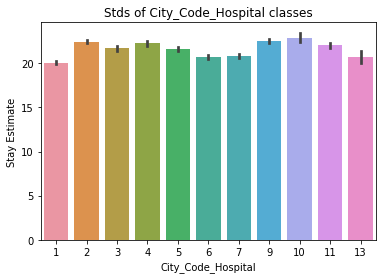

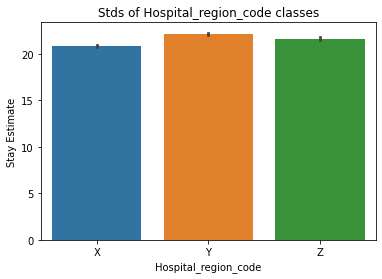

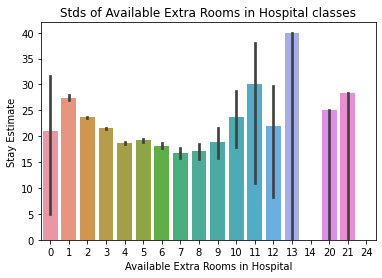

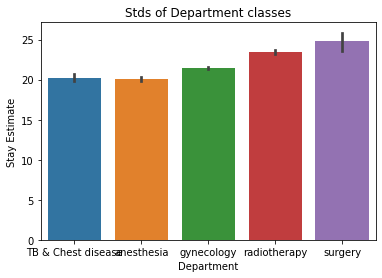

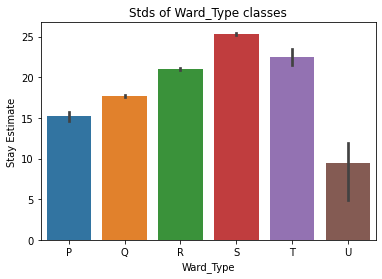

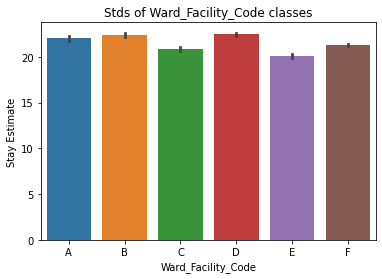

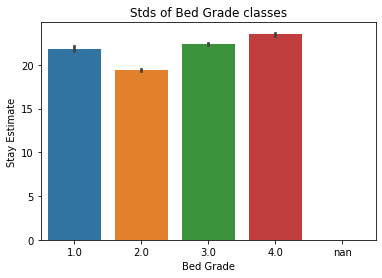

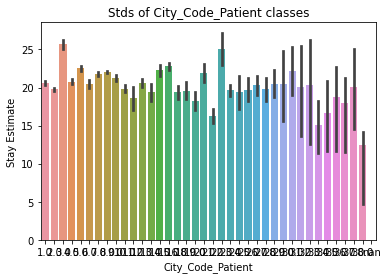

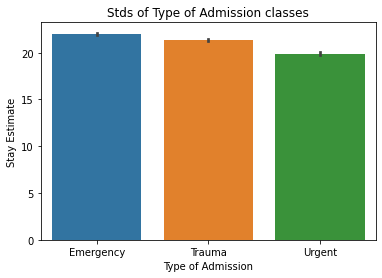

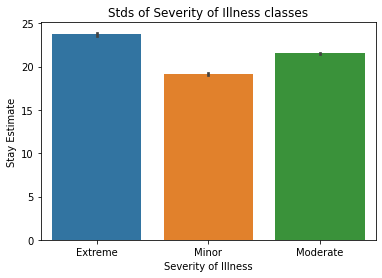

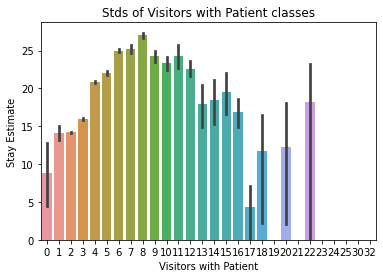

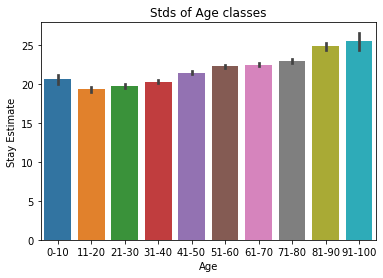

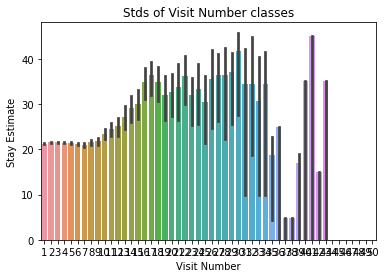

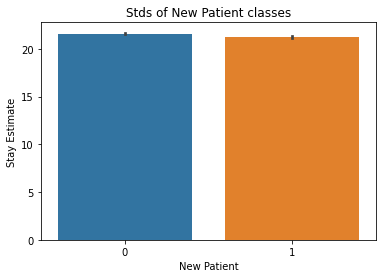

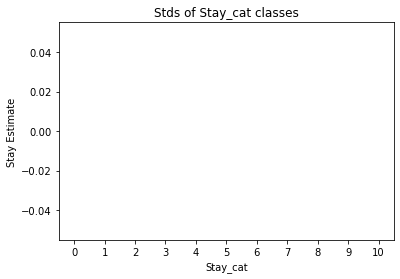

In [31]:
for feature in column_features :
    order = pd.unique(health_care[feature])
    order.sort()
    ax = sns.barplot(x=feature, y="Stay Estimate", data=health_care,order=order, estimator=std)
    ax.set_title(f'Stds of {feature} classes') 
    plt.show();
    
    
    
    

## Conclusion :

Feature that appear to have some influence on the median of the stay : 
- Hospital_code
- Available Extra Room : To verifiy if the amount of available data is conclusive 
- Ward_Type
- City_Code_Patient
- Severity of Illness
- Type Of Admission
- Visitors with Patient : To verify since maybe it's correlated to the length of stay
- Age

[Back to top](#Content:)

<a id='part3'></a>
### Part 3 - Preparing our data

We saw in Part 2 that columns **"Bed Grade"** and **"City_Code_patient"** have missing values. Before deciding whether we shall drop these columns or keep some of them and try to fill the missing values with medians, we can make and analysis to understand the percentage of missing values by creating this function **"perc_mv"**.


In [32]:
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

In [33]:
print('Missing value ratios:\nBed Grade: {}\nCity_Code_Patient: {}'.format(
    perc_mv(health_care, health_care['Bed Grade']),
    perc_mv(health_care, health_care['City_Code_Patient'])))

Missing value ratios:
Bed Grade: 0.035485714644609
City_Code_Patient: 1.4231969802598936


**As we can see, 0.03% of Bed Grade column and 1.42% of City_Code_Patient has missing values. Therefore, we have enough values to fill the rows of the company column via any imputation method.**

In [34]:
# Assuming importance of the City_Code_Patient in the future analysis is minimalistic
# let s drop it 

health_care = health_care.drop(['City_Code_Patient'], axis = 1)

In [35]:
#let's fill missing values of 'Bed Grade' with its median of the column
med = health_care['Bed Grade'].median()
health_care['Bed Grade'] = health_care['Bed Grade'].fillna(med)

In [36]:
#missing values check after data manipulation
health_care.isnull().values.any()

False

Next, we may want to check the features to create some more meaningful variables and reduce the number of features.


In [37]:
#????think of smth to work on the type
#In the code cell below, we use the attribute dtype on df to retrieve the data type for each column.
print (health_care.dtypes)

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object


In [38]:
#We want to map the name of each Severity of Illness to the corresponding number in ascending order.
health_care['Severity of Illness'] = health_care['Severity of Illness'].map({'Minor':1, 'Moderate': 2, 'Extreme':3})
health_care['Type of Admission'] = health_care['Type of Admission'].map({'Trauma':1, 'Emergency': 2, 'Urgent':3})
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,2,3,2,51-60,4911.0,0-10
136814,136815,28,b,11,X,2,gynecology,R,F,3.0,112307,2,2,2,21-30,4517.0,0-10
136815,136816,29,a,4,X,3,gynecology,S,F,3.0,112307,2,2,2,21-30,3846.0,0-10
136823,136824,11,b,2,Y,4,gynecology,Q,D,4.0,64198,2,2,2,21-30,5183.0,0-10
136837,136838,14,a,1,X,3,gynecology,R,E,3.0,76865,2,3,3,51-60,3452.0,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68359,68360,10,e,1,X,2,gynecology,S,E,3.0,113737,1,2,6,61-70,4345.0,More than 100 Days
15335,15336,18,d,13,Y,2,gynecology,R,B,3.0,17210,1,2,8,71-80,4413.0,More than 100 Days
15334,15335,18,d,13,Y,2,gynecology,R,B,3.0,17210,1,2,8,71-80,3080.0,More than 100 Days
31499,31500,26,b,2,Y,2,gynecology,Q,D,3.0,79939,1,2,20,51-60,5087.0,More than 100 Days


For now, we assume these columns are not important for our analysis:

0case_id

1Hospital_code 

2Hospital_type_code

3City_Code_Hospital  

7Ward_Type - anyways we know department, so we can guess the ward type

8Ward_Facility_Code

In [39]:
#dropping unwanted columns
health_care.drop(health_care.columns[0:4],axis=1, inplace=True)
health_care.drop(health_care.columns[3:5], axis=1, inplace=True)
print(health_care.shape)
health_care

(318438, 11)


,Hospital_region_code,Available Extra Rooms in Hospital,Department,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,Z,3,radiotherapy,2.0,31397,2,3,2,51-60,4911.0,0-10
136814,X,2,gynecology,3.0,112307,2,2,2,21-30,4517.0,0-10
136815,X,3,gynecology,3.0,112307,2,2,2,21-30,3846.0,0-10
136823,Y,4,gynecology,4.0,64198,2,2,2,21-30,5183.0,0-10
136837,X,3,gynecology,3.0,76865,2,3,3,51-60,3452.0,0-10
...,...,...,...,...,...,...,...,...,...,...,...
68359,X,2,gynecology,3.0,113737,1,2,6,61-70,4345.0,More than 100 Days
15335,Y,2,gynecology,3.0,17210,1,2,8,71-80,4413.0,More than 100 Days
15334,Y,2,gynecology,3.0,17210,1,2,8,71-80,3080.0,More than 100 Days
31499,Y,2,gynecology,3.0,79939,1,2,20,51-60,5087.0,More than 100 Days


In [40]:
#using LabelEncoder to change and transform the object format of 
#'Hospital_region_code','Department','Age', 'Stay' columns
le = LabelEncoder()
for col in ['Hospital_region_code','Department','Age', 'Stay']:
    health_care[col]= health_care[col].astype('str')
    health_care[col]= le.fit_transform(df[col])
print (df.dtypes)

Hospital_region_code                   int32
Available Extra Rooms in Hospital      int64
Department                             int32
Bed Grade                            float64
patientid                              int64
Type of Admission                      int64
Severity of Illness                    int64
Visitors with Patient                  int64
Age                                    int32
Admission_Deposit                    float64
Stay                                   int32
dtype: object


In [41]:
#shuffling
health_care= health_care.reindex(np.random.permutation(health_care.index))
health_care.reset_index(inplace=True, drop=True)

[Back to top](#Content:)

<a id='part4'></a>
### Part 4 - Correlation

One way to decide which features are going to be more impactful when running an analysis is to look at the correlation between them.

Pearson's correlations are single value numerical summaries that represent the strength and direction of a linear relationship. Correlation values range from -1 to 1. Values further away from 0 represent stronger relationships, and the sign of the correlation (positive or negative) represents the direction of the relationship. The graphs below depict a visual representation of Pearson correlations.

In [42]:
#creating a copy of df to have an original for further manipulation
cor_df = health_care.copy()

In [44]:
#We want to map the name of each Severity of Illness to the corresponding number in ascending order.
corr['Severity of Illness'] = corr['Severity of Illness'].map({'Minor':1, 'Moderate': 2, 'Extreme':3})
corr['Type of Admission'] = corr['Type of Admission'].map({'Trauma':1, 'Emergency': 2, 'Urgent':3})


In [45]:
corr['Age Estimate'] = le.fit_transform(corr['Age']) 

In [46]:
corr['Age Estimate'] = 10*corr['Age Estimate']+5

In [47]:
corr_col = ['Hospital_code', 'City_Code_Hospital','Available Extra Rooms in Hospital','Bed Grade','Type of Admission','Severity of Illness','Visitors with Patient','Admission_Deposit','Age Estimate','Stay Estimate']
corr = corr[corr_col]

In [48]:
corr.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Admission_Deposit,Age Estimate,Stay Estimate
0,8,3,3,2.0,2,3,2,4911.0,55,5
1,2,5,2,2.0,1,3,2,5954.0,55,45
2,10,1,2,2.0,1,3,2,4745.0,55,35
3,26,2,2,2.0,1,3,2,7272.0,55,45
4,26,2,2,2.0,1,3,2,5558.0,55,45


In [49]:
cr = corr.corr()

In [50]:
cr

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Admission_Deposit,Age Estimate,Stay Estimate
Hospital_code,1.000000,0.128294,-0.059638,-0.013739,-0.004417,0.030949,-0.028500,0.045446,0.016322,0.042846
City_Code_Hospital,0.128294,1.000000,-0.045771,-0.049309,0.032415,0.026350,0.018184,-0.034455,0.020507,0.006381
Available Extra Rooms in Hospital,-0.059638,-0.045771,1.000000,-0.115868,0.041737,-0.003307,0.096714,-0.143739,-0.133491,-0.121120
Bed Grade,-0.013739,-0.049309,-0.115868,1.000000,-0.049811,-0.284545,0.088945,0.073833,0.001732,0.025741
Type of Admission,-0.004417,0.032415,0.041737,-0.049811,1.000000,-0.047165,-0.021020,-0.075895,-0.100903,-0.084072
Severity of Illness,0.030949,0.026350,-0.003307,-0.284545,-0.047165,1.000000,0.047292,-0.070892,0.125232,0.126160
Visitors with Patient,-0.028500,0.018184,0.096714,0.088945,-0.021020,0.047292,1.000000,-0.150358,0.073795,0.537537
Admission_Deposit,0.045446,-0.034455,-0.143739,0.073833,-0.075895,-0.070892,-0.150358,1.000000,0.025182,-0.052077
Age Estimate,0.016322,0.020507,-0.133491,0.001732,-0.100903,0.125232,0.073795,0.025182,1.000000,0.094163
Stay Estimate,0.042846,0.006381,-0.121120,0.025741,-0.084072,0.126160,0.537537,-0.052077,0.094163,1.000000


**Remark** :
It seems that visitors with patient is the variable that explains most of variance in the stay estimate, it might be usefull to use a linear regression with only visitors with patient and see results

In [51]:
cr['Stay Estimate'].sort_values(ascending=False)

Stay Estimate                        1.000000
Visitors with Patient                0.537537
Severity of Illness                  0.126160
Age Estimate                         0.094163
Hospital_code                        0.042846
Bed Grade                            0.025741
City_Code_Hospital                   0.006381
Admission_Deposit                   -0.052077
Type of Admission                   -0.084072
Available Extra Rooms in Hospital   -0.121120
Name: Stay Estimate, dtype: float64

In [52]:
## Checking abs value of correlations
cr['Stay Estimate'].abs().sort_values(ascending=False)

Stay Estimate                        1.000000
Visitors with Patient                0.537537
Severity of Illness                  0.126160
Available Extra Rooms in Hospital    0.121120
Age Estimate                         0.094163
Type of Admission                    0.084072
Admission_Deposit                    0.052077
Hospital_code                        0.042846
Bed Grade                            0.025741
City_Code_Hospital                   0.006381
Name: Stay Estimate, dtype: float64

## Features to most likely drop :
- City_Code_Hospital  
- Bed Grade 

These 2 features seemed useless before too ...

## Categorical data correlation

In [53]:
# using from sklearn.preprocessing LabelEncoder 

In [10]:
cor_df['Stay'] = le.fit_transform(cor_df['Stay']) 
cor_df

NameError: name 'le' is not defined

In [55]:
#use corr() on cor_df
cor_df.corr()

,Hospital_region_code,Available Extra Rooms in Hospital,Department,Bed Grade,patientid,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
Hospital_region_code,1.000000,-0.006906,0.041499,-0.042680,-0.002083,0.058217,0.029454,-0.019485,-0.017083,0.075092,0.011905
Available Extra Rooms in Hospital,-0.006906,1.000000,0.047726,-0.115804,0.000921,0.041737,-0.003307,0.096714,-0.133491,-0.143739,-0.121120
Department,0.041499,0.047726,1.000000,-0.096745,0.002217,0.052736,0.004872,0.026054,0.035518,-0.080754,0.033287
Bed Grade,-0.042680,-0.115804,-0.096745,1.000000,0.001638,-0.049850,-0.284407,0.088920,0.001717,0.073779,0.025761
patientid,-0.002083,0.000921,0.002217,0.001638,1.000000,0.004391,-0.006397,0.006889,-0.001505,-0.000877,0.001125
Type of Admission,0.058217,0.041737,0.052736,-0.049850,0.004391,1.000000,-0.047165,-0.021020,-0.100903,-0.075895,-0.084072
Severity of Illness,0.029454,-0.003307,0.004872,-0.284407,-0.006397,-0.047165,1.000000,0.047292,0.125232,-0.070892,0.126160
Visitors with Patient,-0.019485,0.096714,0.026054,0.088920,0.006889,-0.021020,0.047292,1.000000,0.073795,-0.150358,0.537537
Age,-0.017083,-0.133491,0.035518,0.001717,-0.001505,-0.100903,0.125232,0.073795,1.000000,0.025182,0.094163
Admission_Deposit,0.075092,-0.143739,-0.080754,0.073779,-0.000877,-0.075895,-0.070892,-0.150358,0.025182,1.000000,-0.052077


In [56]:
#Because we want to try to predict the likelihood of a length of stay depending on the type of admission, it is useful to visualise the sorted correlation values for the column Type of Admission.
# here, we are appling sort_values() to visualise the correlation values in a descending order.
cor_df.corr()['Type of Admission'].sort_values(ascending=False)

Type of Admission                    1.000000
Hospital_region_code                 0.058217
Department                           0.052736
Available Extra Rooms in Hospital    0.041737
patientid                            0.004391
Visitors with Patient               -0.021020
Severity of Illness                 -0.047165
Bed Grade                           -0.049850
Admission_Deposit                   -0.075895
Stay                                -0.084072
Age                                 -0.100903
Name: Type of Admission, dtype: float64

In [57]:
#let's examine likelihood of a length of stay depending on the Severity of Illness.

cor_df.corr()['Severity of Illness'].sort_values(ascending=False)

Severity of Illness                  1.000000
Stay                                 0.126160
Age                                  0.125232
Visitors with Patient                0.047292
Hospital_region_code                 0.029454
Department                           0.004872
Available Extra Rooms in Hospital   -0.003307
patientid                           -0.006397
Type of Admission                   -0.047165
Admission_Deposit                   -0.070892
Bed Grade                           -0.284407
Name: Severity of Illness, dtype: float64

In [58]:
#???What is the most impactful feature?

In [ ]:
health_care["Stay"] = health_care["Stay"].map({'0-10':'0-10', 
                             '11-20':'11-20', 
                             '21-30':'21-30', 
                             '31-40':'31-40', 
                             '41-50':'41-50', 
                             '51-60':'51-60',
                             '61-70':"more than 60 Days",  
                             '71-80':"more than 60 Days", 
                             '81-90':"more than 60 Days", 
                             '91 - 100':"more than 60 Days", 
                             'More than 100 Days' :"more than 60 Days"})

# df.iloc[np.random.permutation(len(df))]

## new addition - Multicollinearity check + PCA - T

<AxesSubplot:>

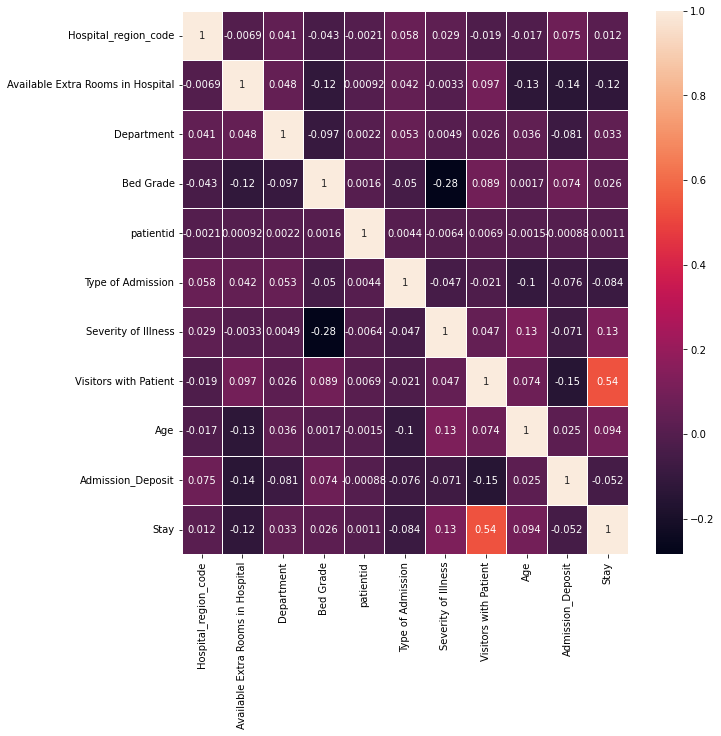

In [59]:
# Heatmap

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [60]:
import statsmodels.api as sm
X = health_care.drop(columns=["Stay"])
y = health_care["Stay"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Stay   R-squared (uncentered):                   0.741
Model:                            OLS   Adj. R-squared (uncentered):              0.741
Method:                 Least Squares   F-statistic:                          9.099e+04
Date:                Thu, 09 Dec 2021   Prob (F-statistic):                        0.00
Time:                        18:31:49   Log-Likelihood:                     -6.3127e+05
No. Observations:              318438   AIC:                                  1.263e+06
Df Residuals:                  318428   BIC:                                  1.263e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_VIF = health_care
data = pd.DataFrame()
data["feature"] = X_VIF.columns
data["VIF"] = [variance_inflation_factor(X_VIF.values, i) for i in range(len(X_VIF.columns))]
print(data)

                              feature        VIF
0                Hospital_region_code   2.097252
1   Available Extra Rooms in Hospital   7.957268
2                          Department  11.291869
3                           Bed Grade   9.110812
4                           patientid   3.873040
5                   Type of Admission   5.932699
6                 Severity of Illness   8.680884
7               Visitors with Patient   6.686882
8                                 Age   5.825253
9                   Admission_Deposit  15.413080
10                               Stay   3.857603


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Choosing the number of components
X = health_care.drop(columns=["Stay"])
y = health_care["Stay"]
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)

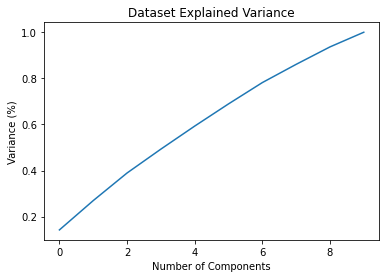

In [63]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [64]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14217335, 0.2694108 , 0.38918835, 0.49279043, 0.59273012,
       0.68901815, 0.78153649, 0.86067056, 0.93636789, 1.        ])

In [65]:
# For our analysis we choose n_components = 7
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_std)
X_pca_with_constant = sm.add_constant(X_pca)

In [66]:
model = sm.OLS(y, X_pca_with_constant)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Stay   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                 1.354e+04
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:31:56   Log-Likelihood:            -6.5413e+05
No. Observations:              318438   AIC:                         1.308e+06
Df Residuals:                  318430   BIC:                         1.308e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6986      0.003    806.776      0.0

In [67]:
# from sklearn.svm import SVC

In [68]:
# X_train, X_test, y_train, y_test = train_test_split(X_pca_with_constant, y, test_size=0.3, random_state=0)
# model = SVC (kernel, C=10)
# model.fit(X_train, y_train)
# y_model = model.predict(X_test)

# accuracy_score(y_test, y_model)

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_pca_with_constant, y)
a, b, score = model.coef_, model.intercept_, model.score(X_pca_with_constant, y)
print('score : %.2f' % score)

score : 0.23


## new addition -SMOTE - T


Under the hood, the SMOTE algorithm works in 4 simple steps:
- Choose a minority class input vector
- Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
- Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
- Repeat the steps until data is balanced

<AxesSubplot:>

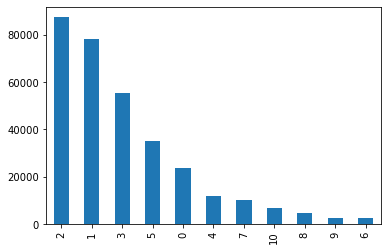

In [70]:
health_care["Stay"].value_counts().plot.bar()

In [71]:
print('Proportion of the different lenght of stay in the data:')
print(health_care["Stay"].value_counts() / len(health_care))

Proportion of the different lenght of stay in the data:
2     0.274751
1     0.245382
3     0.173217
5     0.109968
0     0.074124
4     0.036877
7     0.032201
10    0.020987
8     0.015193
9     0.008683
6     0.008617
Name: Stay, dtype: float64


In [72]:
df_2 = health_care.copy()

X = np.array(df_2.loc[:, df_2.columns != "Stay"])
y = np.array(df_2.loc[:, df_2.columns == "Stay"]).reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver = 'lbfgs')

## Without SMOTE

In [75]:
# fit the model
clf.fit(X_train, y_train)

# prediction for training dataset
train_pred = clf.predict(X_train)

# prediction for testing dataset
test_pred = clf.predict(X_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [76]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.36031365858459924
Accuracy score for Testing Dataset =  0.35908074415948993


In [77]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted    0      1      2      3      5    10     All
True                                                    
0          137   6842   7913    817    106     0   15815
1          105  20158  26177   4225   1680     8   52353
2          147  15873  38132   3248   1172    47   58619
3           86   7879  14936   8464   5498    93   36956
4           50   1964   4484    804    512    54    7868
5           42   2507   4843   7203   8609   258   23462
6            8    321    892    252    323    42    1838
7           12    611   1153   2059   2688   347    6870
8            3    140    210    405   2206   277    3241
9            4    154    302    511    662   220    1853
10           5    166    386    458   2089  1374    4478
All        599  56615  99428  28446  25545  2720  213353


In [78]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted    0      1      2      3      5    10     All
True                                                    
0           58   3378   3921    379     53     0    7789
1           48   9888  12798   2190    860     2   25786
2           67   7857  18732   1598    600    18   28872
3           44   3819   7517   4096   2686    41   18203
4           19    981   2142    463    244    26    3875
5           16   1291   2333   3553   4235   128   11556
6            5    157    464    108    158    14     906
7            8    343    500   1062   1274   197    3384
8            3     62    117    192   1120   103    1597
9            4     68    157    236    339   108     912
10           6    101    177    210    986   725    2205
All        278  27945  48858  14087  12555  1362  105085


## SMOTE wtih PCA X

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_with_constant, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)
clf = LogisticRegression(solver = 'lbfgs')

In [80]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 33)
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

<AxesSubplot:>

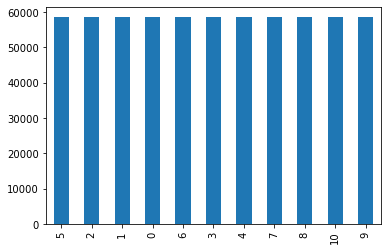

In [81]:
# observe that data has been balanced
pd.Series(y_train_SMOTE).value_counts().plot.bar()

In [82]:
# fit the model
clf.fit(X_train_SMOTE, y_train_SMOTE)

# prediction for Training data
train_pred_sm = clf.predict(X_train_SMOTE)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [83]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_SMOTE))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test.ravel()))

Accuracy score for Training Dataset =  0.20416743562822479
Accuracy score for Testing Dataset =  0.1965456535185802


## SMOTE only


In [84]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 33)
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

<AxesSubplot:>

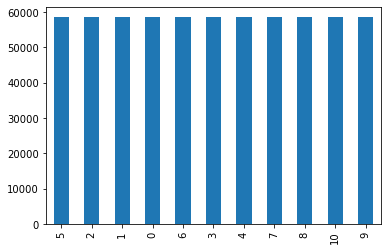

In [85]:
# observe that data has been balanced
pd.Series(y_train_SMOTE).value_counts().plot.bar()

In [86]:
# fit the model
clf.fit(X_train_SMOTE, y_train_SMOTE)

# prediction for Training data
train_pred_sm = clf.predict(X_train_SMOTE)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [87]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_SMOTE))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test.ravel()))

Accuracy score for Training Dataset =  0.20416743562822479
Accuracy score for Testing Dataset =  0.1965456535185802


In [88]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_SMOTE, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted       0      1      2      3      4      5      6      7      8  \
True                                                                        
0           25984   8548   7280   2529   2219   3574   4344   1323   1103   
1           17043  11919  10373   3208   2276   2597   5909   1021   1728   
2           14420   8388  16227   2448   2750   1922   8147    801   1046   
3           11990   6748   9774   3541   2052   3622   7358   1765   5038   
4           12848   7791  13391   2536   2728   2408   8972   1383   2175   
5            8513   3436   5405   3122   1701   4085   7621   2429   8169   
6            7914   5846  11801   2240   2211   3177  10021   1749   4618   
7            6833   2626   4184   2792   1782   3909   8021   2403   7714   
8            3245   1327   1164   2323    614   3020   2880   1576  15560   
9            6153   2408   3716   2530   1357   3178   8452   2362   5950   
10           2718    774   1786   1170  

In [89]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted      0      1      2     3     4     5      6     7     8     9  \
True                                                                        
0           3371   1163   1027   325   271   439    584   163   183   220   
1           7457   5258   4508  1348   993  1214   2626   470   778   911   
2           7120   4055   8045  1140  1398   920   3980   429   555  1002   
3           3684   2109   3179  1046   725  1108   2175   527  1518  1419   
4            875    531    801   162   178   169    558    79   187   233   
5           1694    744   1069   624   307   760   1502   456  1560  1685   
6            150     77    191    37    22    40    145    28    68    81   
7            438    194    210   179    75   208    406   124   476   547   
8            106     35     43    40    12    68     99    35   424   221   
9             86     33     76    34    20    56    103    32   119   168   
10           120     38     74    27    1

[Back to top](#Content:)


<a id='part5'></a>

## Part 5 - Splitting our data for modelling

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X = health_care.drop(columns=["Stay"])
y = health_care["Stay"]
print(X.shape)
print(y.shape)


In [ ]:
#test size = 20%, train size = 80%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 
print("Predictions form the classifier:")
print(knn.predict(X_test))
print("Target values:")
print(y_test)

In [93]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [94]:
#creating Perceptron
ppn = Perceptron(max_iter=40, tol = 0.001, eta0=1)

In [95]:
#train the model
ppn.fit(X_train_std, y_train)

In [96]:
#make prediction
y_pred = ppn.predict(X_test_std)

In [97]:
#accuracy
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred)) 

In [98]:
# from sklearn.model_selection import KFold
# from sklearn.tree import DecisionTreeClassifier
# decision_tree = DecisionTreeClassifier (criterion = "entropy")


# kf = KFold(5)
# fold = 1
# for train_index, validate_index in kf.split(X,y):
#     decision_tree.fit(X[train_index], y[train_index])
#     y_test= y[validate_index]
#     y_pred = decision_tree.predict(X[validate_index])
#     print (f"Fold #{fold}, Training Size: {len(X[train_index])}, Validation Size: {len(X[validate_index])}")
#     print("Accuracy: %.2f" %accuracy_score(y_test,y_pred))

# Data preparation - Baraa

# Hot encoded Data

In [99]:
# Function to hot encode the column with name : name for dataframe df
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True) ## inplace to make changed on the original df

In [100]:
## Pre processing these columns

le_string_columns = [  'Severity of Illness', 'Age' ]
dummies_string_columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',  'Type of Admission']
encoder = LabelEncoder()
#ohEncoder = OneHotEncoder()

## label_encoded data
Xe = health_care.drop(['Stay', 'case_id', 'City_Code_Hospital','City_Code_Patient', 'Bed Grade'], axis=1)
Xe['Severity of Illness']= Xe['Severity of Illness'].map({'Minor': 0,  'Moderate': 1,'Extreme': 2})
Xe['Age'] = encoder.fit_transform(Xe['Age'])

ye = health_care['Stay']
ye = encoder.fit_transform(ye)


for column in dummies_string_columns :
    encode_text_dummy(Xe, column)
    

## Scaling Hot Encoded Data

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = Xe.values
y = ye
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
for i in range(X_train.shape[1]) :
    X_train[:,i]= scaler.fit_transform(X_train[:,i].reshape(-1, 1))[:,0]
    X_test[:,i] = scaler.transform(X_test[:,i].reshape(-1, 1))[:,0]

[Back to top](#Content:)


<a id='part6'></a>

## Part  - KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(3) 
clf.fit(X_train, y_train) 

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
#accuracy
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

[Back to top](#Content:)


<a id='part6'></a>

## Part  - NN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics

In [ ]:
model = Sequential()

#model.add(Dropout(0.1)) #applies to layer before ie input here
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1))


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
model.fit(X_train,y_train,callbacks=[monitor],verbose=2,epochs=1000)
pred = model.predict(X_test)
#accuracy
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))


In [ ]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))
model.summary()

In [ ]:
# # compile the keras model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # fit the keras model on the dataset
# model.fit(X, y, epochs=150, batch_size=10)
# # evaluate the keras model
# accuracy = model.evaluate(X, y)
# print('Accuracy: %.2f' % (accuracy*100))

[Back to top](#Content:)


<a id='part6'></a>

## Part  - SVM

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#accuracy
print('Accuracy: %.2f' %accuracy_score(y_test,y_pred))

## for any dataset need to check the Precision and Recall

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",recall_score(y_test, y_pred))

[Back to top](#Content:)


<a id='part6'></a>

## Part  - Decision Trees

In [102]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [103]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

Accuracy : 1.000
Score : 1.00


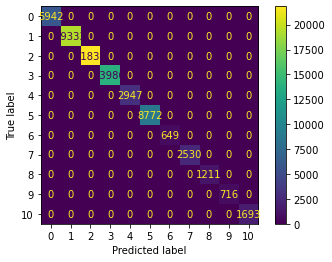

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = tree.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.2f' % score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

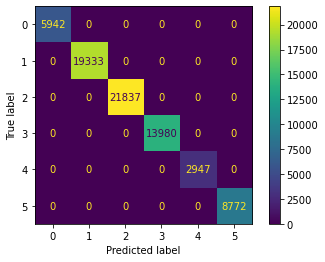

In [107]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

## Conclusion :

Most confusion happens within the square 1-3. Also between Cat3 and Cat5

[Back to top](#Content:)


<a id='part7'></a>

## Part 7 - Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [109]:
forest = RandomForestClassifier(n_estimators=10, criterion='entropy')
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

Accuracy : 0.999
Score : 0.9998


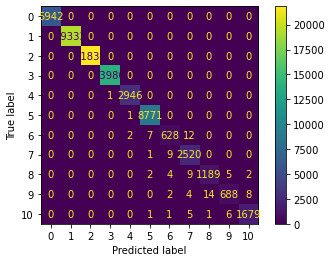

In [110]:
y_pred = forest.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

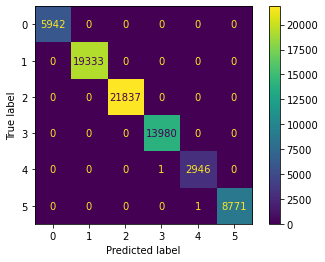

In [111]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

In [112]:
### Cross Validating to check some results
kf = KFold(5, shuffle=True)
fold = 1

for train_index, validate_index in kf.split(X,y):
    forest.fit(X[train_index], y[train_index])
    ytest = y[validate_index]
    y_pred = forest.predict(X[validate_index])
    print(f'Accuracy : %.4f' % accuracy_score(ytest, y_pred))
    print(f'Score : %.4f' % score(ytest, y_pred))

Accuracy : 0.9988
Score : 0.9998
Accuracy : 0.9982
Score : 0.9997
Accuracy : 0.9983
Score : 0.9998
Accuracy : 0.9970
Score : 0.9995
Accuracy : 0.9983
Score : 0.9998


### Trying Different num of estimators

In [113]:
accuracy_data = []
score_data = []

for i in range(1,2):
    forest = RandomForestClassifier(n_estimators=i, criterion='entropy')
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    score = 1-np.mean(np.abs(y_test-y_pred))/K
    print(f'Accuracy {i} estimators : %.4f' % accuracy)
    print(f'Score {i} estimators : %.4f' % score)
    accuracy_data.append(accuracy)
    score_data.append(score)
    
    

Accuracy 1 estimators : 0.9741
Score 1 estimators : 0.9962


In [120]:
# nums = np.arange(1,40)
# fig = plt.figure(figsize=(6,5))
# plt.plot(nums, accuracy_data, c='r', label='Accuracy')
# plt.plot(nums, score_data, label='Score')
# plt.xlabel('Number of Trees')
# plt.ylabel('Accuracy and Score')
# plt.legend(loc='upper right')
# plt.show();

## Last Model results

Accuracy : 0.974
Score : 0.9962


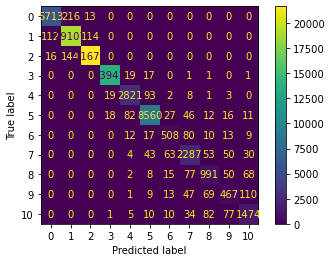

In [121]:
y_pred = forest.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.4f' % score)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

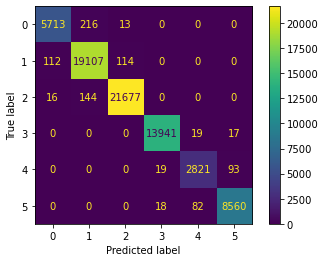

In [122]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

## Conclusion :
Same conclusion as before 

[Back to top](#Content:)


<a id='part8'></a>

## Part 8 - Naive Bayes

In [123]:
from sklearn.naive_bayes import GaussianNB
smoothing = [1e-3, 1e-2, 1e-1, 1, 10,100]


Let's try different smoothing values

In [124]:
for i in range(len(smoothing)):
    model = GaussianNB(var_smoothing=smoothing[i])
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)
    print('var_smoothing = ',smoothing[i] )
    print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
    score = 1-np.mean(np.abs(y_test-y_pred))/K
    print(f'Score : %.4f' % score)
    print('---------' )


var_smoothing =  0.001
Accuracy : 1.000
Score : 1.0000
---------
var_smoothing =  0.01
Accuracy : 0.992
Score : 0.9992
---------
var_smoothing =  0.1
Accuracy : 0.819
Score : 0.9808
---------
var_smoothing =  1
Accuracy : 0.463
Score : 0.9313
---------
var_smoothing =  10
Accuracy : 0.276
Score : 0.8570
---------
var_smoothing =  100
Accuracy : 0.274
Score : 0.8512
---------


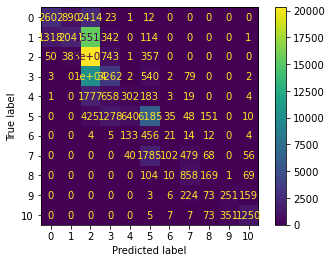

In [125]:
## Keeping smoothing = 1
model = GaussianNB(var_smoothing=1)
model.fit(X_test, y_test)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

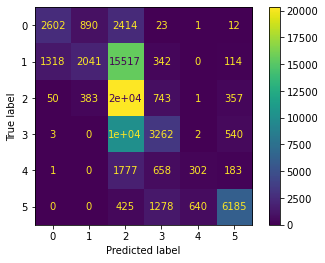

In [126]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

[Back to top](#Content:)


<a id='part9'></a>

## Part 9 - Gradient Boost Classifier


In [127]:
from sklearn.ensemble import GradientBoostingClassifier

In [128]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [129]:
y_pred = model.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.4f' % score)

Accuracy : 1.000
Score : 1.0000


In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

# Conclusion :

Slightly better results than Random Forest.

Confusion is high when true label is when and its predicted 2, and when true label is 3 and is predicted 2. The model tends to predict category 2 a lot.

[Back to top](#Content:)


<a id='part10'></a>

## Part 10 - Cat Boost Classifier


In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=1000)


In [ ]:
cb.fit(X_train, y_train)

In [ ]:
y_pred = cb.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))


In [ ]:
y_pred = y_pred.flatten()
y_pred.shape


In [ ]:
y_diff = np.abs(y_test-y_pred)

In [ ]:
score = 1-np.mean(y_diff)/K
print(f'Score : %.4f' % score)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

# Conclusion :

Similar Conclusion to Gradient BOOST

[Back to top](#Content:)


<a id='part11'></a>

## Part 11 - XGB BOOST Classifier


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
y_pred = xgb.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.4f' % score)